<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Total_Regression_Version400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  3.50it/s]


In [4]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13507,Testing,O,13,Moderate,2,Mild,50,Severe,66,...,79.937851,22.151622,197.372995,17.816809,118.293635,83.565242,111.540745,5.431644,0.420638,5.607971
1,14079,Testing,O,9,Moderate,5,Mild,49,Severe,66,...,42.601987,28.010216,301.298782,26.930368,67.890208,340.768531,76.531418,2.396348,1.124290,2.870203
2,14064,Testing,O,10,Moderate,5,Mild,49,Severe,65,...,44.004984,139.017113,158.342973,121.799067,85.689450,72.301786,117.300896,0.627266,0.467384,0.927110
3,14474,Testing,O,15,Moderate,5,Mild,45,Severe,66,...,85.013484,96.023870,71.831104,84.756438,112.899410,51.613703,165.477110,1.110284,0.734254,1.945224
4,14466,Testing,O,15,Moderate,5,Mild,46,Severe,67,...,870.744683,243.331217,74.530193,478.061746,322.980752,13.167193,806.923094,1.377682,0.209769,1.714426
5,13249,Testing,O,9,Moderate,6,Mild,52,Severe,67,...,99.491677,94.006116,141.230466,100.511433,225.871439,26.272635,226.119728,2.336755,0.173441,2.274752
6,13353,Testing,O,13,Moderate,6,Mild,49,Severe,70,...,97.994128,125.917642,135.213318,121.215941,112.699095,109.531892,130.117581,0.875872,0.822262,0.979593
7,13347,Testing,O,14,Moderate,5,Mild,50,Severe,70,...,62.018063,290.159806,107.128405,132.866264,157.785168,74.217080,178.040834,0.573310,0.721339,1.374334
8,13518,Testing,O,13,Moderate,5,Mild,49,Severe,70,...,194.867349,82.192958,65.300421,157.798670,111.993083,23.165973,326.354252,1.329707,0.362477,2.046901
9,14150,Testing,O,11,Moderate,6,Mild,52,Severe,69,...,267.196207,222.505592,101.319626,252.955295,281.819677,35.088302,407.364636,1.237216,0.343807,1.579850


In [5]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

In [6]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)



featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 20
              Specs      Score
777         TA-G-92  10.704290
778         TA-G-93  10.435887
776         TA-G-91  10.124835
779         TA-G-94  10.054740
785        TA-G-100   9.326856
784         TA-G-99   9.258559
783         TA-G-98   9.114356
780         TA-G-95   9.028713
782         TA-G-97   8.846460
781         TA-G-96   8.514041
775         TA-G-90   8.418734
774         TA-G-89   6.509001
791  Swing_CCI_TA-G   5.187424
773         TA-G-88   5.087170
495        TA-RF-12   4.312089
571        TA-RF-88   4.284253
570        TA-RF-87   4.135177
772         TA-G-87   4.132857
496        TA-RF-13   4.006076
572        TA-RF-89   3.987610


In [7]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [8]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [9]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

#Model Result Analyzing Functions

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns


def R2_Score(temp_y,temp_pred):
  return r2_score(temp_y,temp_pred)


def MS_error(temp_y,temp_pred):
  return mean_squared_error(temp_y, temp_pred)




def observe_plot(temp_y,temp_pred,width,height):
  plt.figure(figsize=(width,height))
  plt.scatter(temp_y, temp_pred, color = "blue")
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()


def pred_dataframe(temp_y,temp_pred):
  return pd.DataFrame(
        {
            "Actual Value":temp_y,
            "Predicted Value":temp_pred,
            "Difference":temp_y-temp_pred
        })




def reg_plot(pred_y_df,width,height):
  sns.set(rc={'figure.figsize':(width,height)})
  sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);





#Linear Regression

###Model Training

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

###Training Results

In [53]:
y_pred_train = lin_reg.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.31803160561334076
Mean squared error:  311.27519127020037


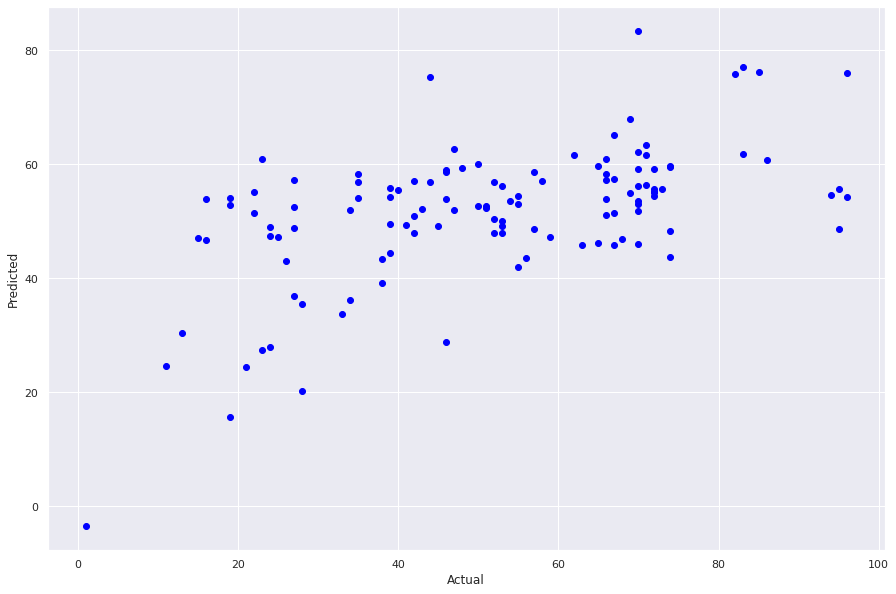

In [47]:
observe_plot(y_train,y_pred_train,width=15,height=10)

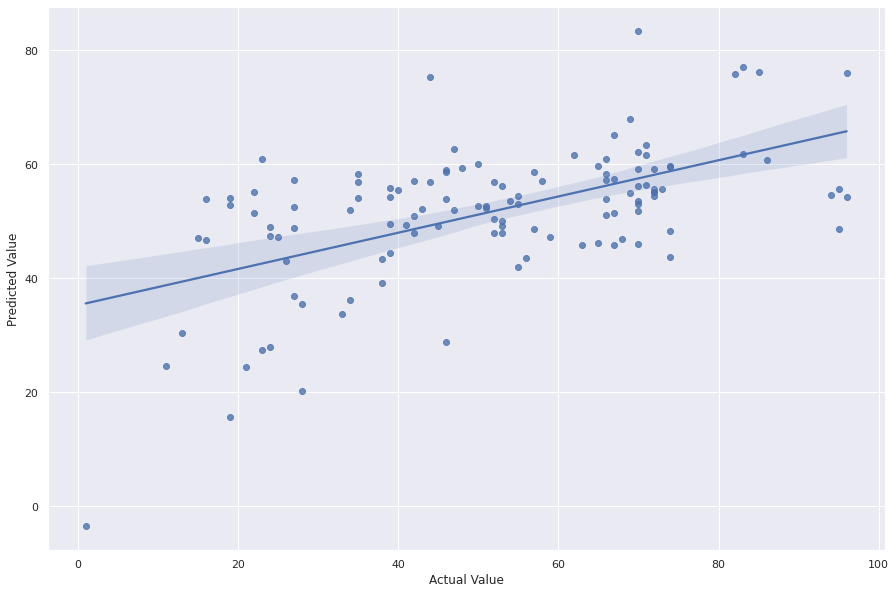

In [51]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)

###Testing Results

In [54]:
y_pred_test = lin_reg.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -5.7475710496283
Mean squared error:  3397.8829897905534


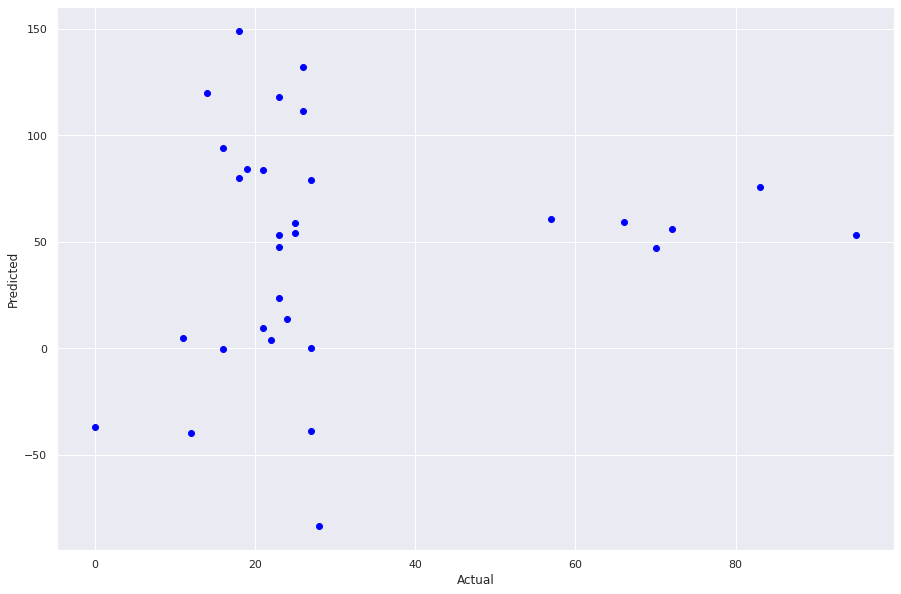

In [48]:
observe_plot(y_test,y_pred_test,width=15,height=10)

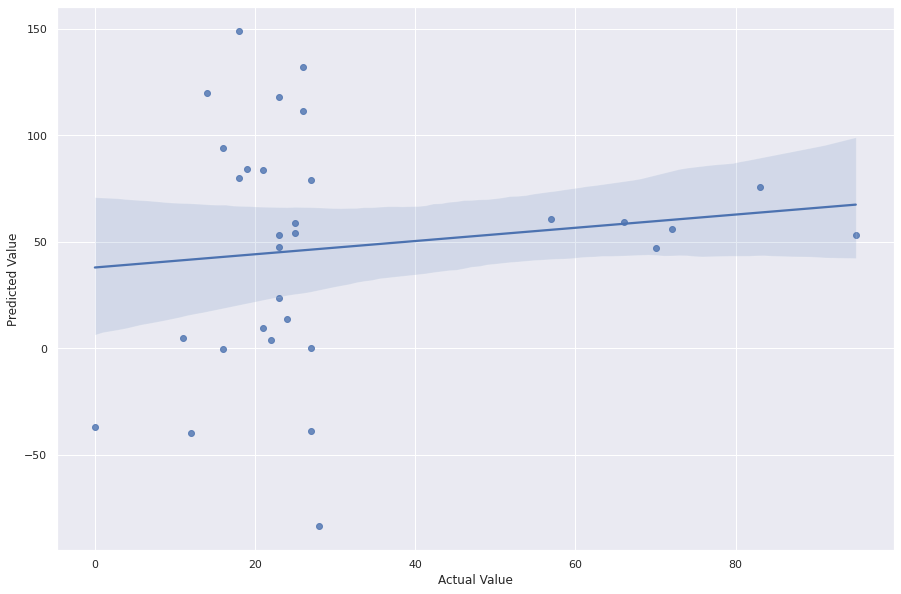

In [52]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)